In [284]:
import pandas as pd #---->to create dataframes
import numpy as np #---->for arthimetic operations
import matplotlib.pyplot as plt # ---->or visualizations
import seaborn as sns #---->for interactive visualizations
from datetime import datetime #----->to split the pick_up date
import calendar #---->to compare year , month from pickup date
from math import sin,cos,atan2,sqrt,radians,asin#----> to calculate distance between 2 coordinates

from geopy.distance import great_circle
from geopy.distance import geodesic

from geopy.geocoders import Nominatim




In [291]:
tr = pd.read_csv("train_cab.csv")

tr.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [299]:
def data_cleaning_stage(df):
    #df.info()
    
    def outliers(df,x,r,l):
        value = df[(df[x] < l)|(df[x] > r)][x]
        print(value)
  
        print(x,":no. of outliers:",len(value))
        for i in value:
            df[x].loc[i] = np.nan
        df[x] = df[x].fillna(df[x].mean())
        print("no. of missing values after removing the outliers",df[x].isnull().sum())
           
    outliers(df,'pickup_latitude',90.0,-90.0)
    outliers(df,'pickup_longitude',180.0,-180.0)
    outliers(df,'dropoff_longitude',90.0,-90.0)
    outliers(df,'dropoff_latitude',180.0,-180.0)
        
    def calculateDistance(lat1,long1,lat2,long2):
        radius = 6371
        dlat = np.abs(np.radians(lat1)-np.radians(lat2))
        dlong = np.abs(np.radians(long1)-np.radians(long2))
        t1 = (np.sin(dlat/2)**2)+(np.cos(radians(lat1))*np.cos(radians(lat2))*np.sin(dlong/2)**2)
        t2 = 2*(atan2(np.sqrt(t1),np.sqrt(1-t1)))
        return radius*t2
    df['distance']=df.apply(lambda row:calculateDistance(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

    def calculateLocation(lat1,long1,lat2,long2):
        geolocator = Nominatim(user_agent="specify_your_app_name_here")
        return  geolocator.reverse(lat1,long1)

    #calculate the month , day , year , weekday or weekend
    df['date']=df['pickup_datetime'].str.rsplit(" ", n=2, expand=True)[0]
    df['time']=df['pickup_datetime'].str.rsplit(" ", n=2, expand=True)[1]
    df['year']=df['date'].str.rsplit("-", n=3, expand=True)[0]
    df['month']=pd.to_numeric(df['date'].str.rsplit("-", n=3, expand=True)[1])
    df['day']=pd.to_numeric(df['date'].str.rsplit("-", n=3, expand=True)[2])
    df['hr']=pd.to_numeric(df['time'].str.rsplit(":", n=2, expand=True)[0])
    #df = df.drop(df[df['date'].isnull() == True].index,inplace=True)
    
    #df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
    
    def time_date_outliers(df,x,lower,upper):
        value = []
        value = df[(df[x] < lower)|(df[x] > upper)][x]
        print (x,":no. of outliers:",len(value))
        for i in value:
            df[x].loc[i] = np.nan
       
        print("no. of missing values before removing the outliers",df[x].isnull().sum())
        df[x] = df[x].fillna(df[x].mode())
        print(df[x].isnull().sum())
        print("no. of missing values after removing the outliers",df[x].isnull().sum())

    
    time_date_outliers(df,'month',1,12)
    time_date_outliers(df,'day',1,31)
    time_date_outliers(df,'hr',0,23)
    print("end of the datacleaning stage")
    df['location_pickup']=df.apply(lambda row:calculateDistance(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)
    return df

In [300]:
tr = data_cleaning_stage(tr)


#tr.describe()

5686    401.083332
Name: pickup_latitude, dtype: float64
pickup_latitude :no. of outliers: 1
no. of missing values after removing the outliers 0
Series([], Name: pickup_longitude, dtype: float64)
pickup_longitude :no. of outliers: 0
no. of missing values after removing the outliers 0
Series([], Name: dropoff_longitude, dtype: float64)
dropoff_longitude :no. of outliers: 0
no. of missing values after removing the outliers 0
Series([], Name: dropoff_latitude, dtype: float64)
dropoff_latitude :no. of outliers: 0
no. of missing values after removing the outliers 0
month :no. of outliers: 0
no. of missing values before removing the outliers 1
1
no. of missing values after removing the outliers 1
day :no. of outliers: 0
no. of missing values before removing the outliers 1
1
no. of missing values after removing the outliers 1
hr :no. of outliers: 0
no. of missing values before removing the outliers 1
1
no. of missing values after removing the outliers 1
end of the datacleaning stage


In [302]:

tr.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,date,time,year,month,day,hr,location_pickup
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009-06-15,17:26:21,2009,6.0,15.0,17.0,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010-01-05,16:52:16,2010,1.0,5.0,16.0,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011-08-18,00:35:00,2011,8.0,18.0,0.0,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012-04-21,04:30:42,2012,4.0,21.0,4.0,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010-03-09,07:51:00,2010,3.0,9.0,7.0,1.999157


ValueError: could not convert string to float: '430-'

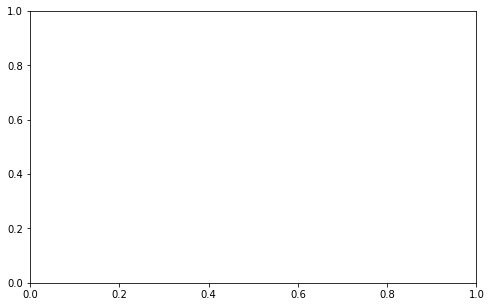

In [266]:
plt.figure(figsize=(8,5))
sns.kdeplot(tr['fare_amount']).set_title("Distribution of Trip Fare")

In [267]:
print("Longitude Boundary in train data")
min(tr.pickup_longitude.min(), tr.dropoff_longitude.min()),max(tr.pickup_longitude.max(), tr.dropoff_longitude.max())

Longitude Boundary in train data


(-74.438233, 40.802437)

In [268]:
print("Latitude Boundary in train data")
min(tr.pickup_latitude.min(), tr.pickup_latitude.min()),max(tr.pickup_latitude.max(), tr.pickup_latitude.max())

Latitude Boundary in train data


(-74.006893, 401.083332)

In [269]:
boundary={'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

(-74.03, -73.75)

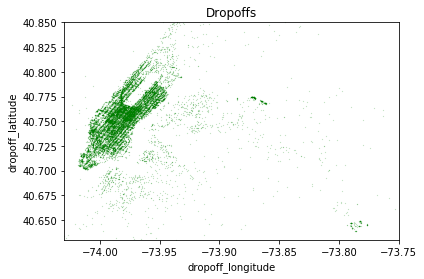

In [270]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

tr.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Dropoffs")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

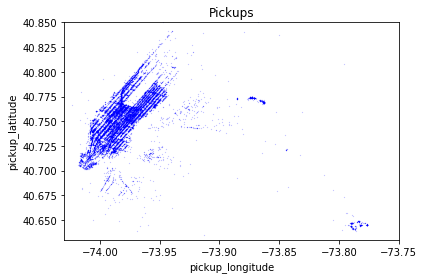

In [271]:
tr.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue', 
                s=.02, alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

SyntaxError: invalid syntax (<ipython-input-277-2a9b36d9a1d3>, line 7)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

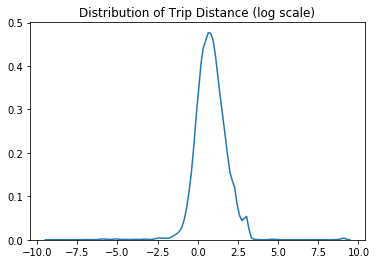

In [278]:
sns.kdeplot(np.log(tr['distance'].values)).set_title("Distribution of Trip Distance (log scale)")

TypeError: nan is not a string

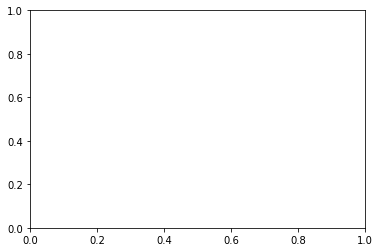

In [281]:
plt.scatter(x=tr['distance'],y=tr['fare_amount'])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

In [283]:
for index, row in tr.iterrows():
    
    folium.CircleMarker([row['dropoff_latitude_round3'], row['dropoff_longitude_round3']],
                        radius=3,
                        
                        color="#008000", 
                        fill_opacity=0.9
                       ).add_to(drop_map)

NameError: name 'folium' is not defined

In [304]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")

In [305]:
location = geolocator.reverse("40.721319,-73.844311")

In [317]:
location.raw['place_id']

134889600